# Geometric Intuitions & Computational Insights
(Mostly numpy insights)

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


## Hadamard Product
numpy's np.multiply() function returns the Hadamard Product (element-wise). 

The * operator can be used as a shorthand for np.multiply on ndarrays. 

**Don't confuse it for matrix multiplication operation**

In [38]:
A = np.array([[1, 2, 3],
              [0, 1, 0]])
B = np.array([[1, 0, 1], 
              [0, 1, 1]])
print("A*B: ") 
print(A*B)

A*B: 
[[1 0 3]
 [0 1 0]]


# Norms

Formally, $L_p$ norm is defined as:
$$\|\boldsymbol{x}\|_p=\left(\sum_i\left|x_i\right|^p\right)^{\frac{1}{p}}$$


## $L_1$ Norm
The $L_1$ norm is commonly used in machine learning when the diﬀerence between zero and nonzero elements is very important. Every time an element of x moves away from 0 by $\epsilon$, the $L_1$ norm increases by $\epsilon$.

In [39]:
# L_1 norm for vectors
a = np.array([1, 4, 2])
print("a: ")
print(a)
l1norm = (sum(list(map(lambda n: n, np.nditer(a)))))
print("L1 norm of a, l1norm = " + str(l1norm))
print("np.linalg.norm(a, ord=1) == l1norm: " + str(np.linalg.norm(a, ord=1) == l1norm))


a: 
[1 4 2]
L1 norm of a, l1norm = 7
np.linalg.norm(a, ord=1) == l1norm: True


## $L_2$ Norm
The $L_2$ norm is known as the Euclidean norm, which is simply the Euclidean distance from the origin to the point identiﬁed by x. 

Denoted simply as $||x||$ with the subscript 2 omitted. 

**Numpy's np.linalg.norm() function defaults to $L_2$ norm for vectors and Frobenius norm for matricies**

## Frobenius Norm
$$\|A\|_F=\sqrt{\sum_{i, j} A_{i, j}^2}$$
Analogous to the $L_2$ norm of a vector, but if you instead stacked all elements into a vector

In [40]:
# numpy defaults to L_2 norm for vectors
b = np.array([1, 0, 2])
print("b: ")
print(b)
l2norm = (sum(list(map(lambda n: n ** 2, np.nditer(b))))**0.5)
print("L2 norm of b, l2norm = " + str(l2norm))
print("np.linalg.norm(b) == l2norm: " + str(np.linalg.norm(b) == l2norm))
print("\n")

# numpy defaults to Frobenius norm for matricies
M = np.array([[1, 2, 3],
              [0, 1, 0]])
print("M: ")
print(M)
frnorm = (sum(list(map(lambda n: n ** 2, np.nditer(M))))**0.5)
print("Fronebius norm of M, frnorm = " + str(frnorm))
print("np.linalg.norm(M) == frnorm: "+str(np.linalg.norm(M) == frnorm))


b: 
[1 0 2]
L2 norm of b, l2norm = 2.23606797749979
np.linalg.norm(b) == l2norm: True


M: 
[[1 2 3]
 [0 1 0]]
Fronebius norm of M, frnorm = 3.872983346207417
np.linalg.norm(M) == frnorm: True


It is also common to measure the size of a vector using the **squared** $L_2$ norm, which can be calculated simply as $x^Tx$.

In [41]:
print("Squared L2 norm of b, or b transpose b: " + str(b.T.dot(b)))
print("np.isclose(np.linalg.norm(b)**2, b.T.dot(b)):\n" +
      str(np.isclose(np.linalg.norm(b)**2, b.T.dot(b))))


Squared L2 norm of b, or b transpose b: 5
np.isclose(np.linalg.norm(b)**2, b.T.dot(b)):
True


## "$L_0$ Norm"
We sometimes measure the size of the vector by counting its number of nonzero elements. Some authors refer to this function as the “$L_0$ norm,” but this is incorrect terminology. The number of nonzero entries in a vector is not a norm, because scaling the vector by $α$ does not change the number of nonzero entries. The $L_0$ norm is often used as a substitute for the number of nonzero entries.

In [42]:
# numpy norm function with ord=0 gives L_0 norm for vectors
print("b: ")
print(b)
l0norm_b = (sum(list(map(lambda n: 1 if n != 0 else 0, np.nditer(b)))))
print("L0 norm of b, l0norm_b = " + str(l0norm_b))
print("np.linalg.norm(b, ord=0) == l0norm_b\n" +
      str(np.linalg.norm(b, ord=0) == l0norm_b))

print('\n')

print("M: ")
print(M)
l0norm_M = (sum(list(map(lambda n: 1 if n != 0 else 0, np.nditer(M)))))
print("L0 norm of M, l0norm_M = " + str(l0norm_M))
# however is undefined for matricies
try:
    print("np.linalg.norm(M, ord=0) == l0norm_M\n" +
      str(np.linalg.norm(M, ord=0) == l0norm_M))
except Exception as e:
    print(e)


b: 
[1 0 2]
L0 norm of b, l0norm_b = 2
np.linalg.norm(b, ord=0) == l0norm_b
True


M: 
[[1 2 3]
 [0 1 0]]
L0 norm of M, l0norm_M = 4
Invalid norm order for matrices.


The dot product of two vectors can be rewritten in terms of norms. Speciﬁcally
$$
\boldsymbol{x}^{\top} \boldsymbol{y}=\|\boldsymbol{x}\|_2\|\boldsymbol{y}\|_2 \cos \theta
$$
where $θ$ is the angle between x and y

a: 
[1 4 2]
b: 
[1 0 2]
np.isclose(a.T.dot(b), np.linalg.norm(a) * np.linalg.norm(b) * np.cos(angle_between(a, b)))
True
Angle between a, b: 60.79406775260058 degrees


(-5.0, 5.0)

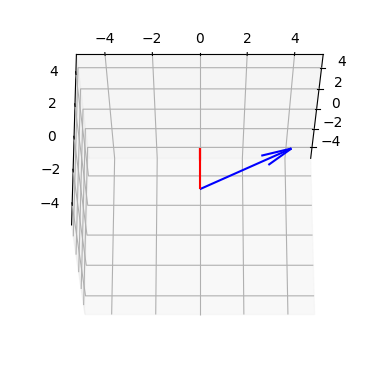

In [43]:
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)


def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))


def spherical_angles(vector):
    x, y, z = vector
    r = np.linalg.norm(vector)

    # Ensure we don't divide by zero for vectors on the z axis
    if r == 0:
        return (0, 0)

    theta = np.arctan2(y, x)  # azimuth angle
    phi = np.arccos(z / r)  # elevation angle

    return (np.degrees(theta), np.degrees(phi))  # convert to degrees

print("a: ")
print(a)
print("b: ")
print(b)

print("np.isclose(a.T.dot(b), np.linalg.norm(a) * np.linalg.norm(b) * np.cos(angle_between(a, b)))\n" +
      str(np.isclose(a.T.dot(b), np.linalg.norm(a) *
          np.linalg.norm(b)*np.cos(angle_between(a, b)))))

print("Angle between a, b: "+str(angle_between(a,b)*180/np.pi)+" degrees")


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#print(np.cross(a, b))
#print(spherical_angles(np.cross(a,b)))
ax.view_init(elev=-24, azim=0, roll=0)


ax.quiver(0, 0, 0, a[0], a[1], a[2], color='b')
ax.quiver(0, 0, 0, b[0], b[1], b[2], color='r')
#ax.quiver(0, 0, 0, np.cross(a, b)[0], np.cross(a, b)[1], np.cross(a, b)[2], color='g')


ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([-5, 5])





One other norm that commonly arises in machine learning is the L∞ norm, also known as the max norm. This norm simpliﬁes to the absolute value of the element with the largest magnitude in the vector.

## Eigenstuffs
An eigenvector of a square matrix A is a nonzero vector v such that multiplication by A alters only the scale of v:
Av = λv.

In [44]:
A = np.array([[0, 5, -10],
              [0, 22, 16],
              [0, -9, -2]])
eigval = np.linalg.eig(A)[0]
print("eigenvalues")
print(eigval)
eigvec = np.linalg.eig(A)[1]
print("eigenvectors")
print(eigvec)

eigenvalues
[ 0.         10.00000011  9.99999989]
eigenvectors
[[ 1.          0.70710678 -0.70710679]
 [ 0.          0.56568543 -0.56568542]
 [ 0.         -0.42426407  0.42426407]]


Demonstration of property Av = λv:

In [46]:
#Av
print("Av:")
display(A.dot(eigvec[:,1])) 
#lambda v
print("lambda v:")
display(eigval[1]*(eigvec[:,1]))

Av


array([ 7.07106784,  5.65685436, -4.24264073])

lambda v


array([ 7.07106784,  5.65685436, -4.24264073])

### Eigendecomposition
The eigendecomposition of A is then given by
$$
\boldsymbol{A}=\boldsymbol{V} \operatorname{diag}(\boldsymbol{\lambda}) \boldsymbol{V}^{-1}
$$

In [49]:
np.diag(eigval)

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.        , 10.00000011,  0.        ],
       [ 0.        ,  0.        ,  9.99999989]])

In [50]:
print("A:")
display(A)
print("eigendecomp:")
display(eigvec.dot(np.diag(eigval).dot(np.linalg.inv(eigvec))))

A


array([[  0,   5, -10],
       [  0,  22,  16],
       [  0,  -9,  -2]])

eigendecomp


array([[ 0.        ,  4.99999998, -9.99999989],
       [ 0.        , 22.00000001, 16.00000007],
       [ 0.        , -8.99999997, -2.00000005]])

## Singular Value Decomposition
If a matrix is not square, the eigendecomposition is not defined, and we must use singular value decomposition instead